<a href="https://colab.research.google.com/github/hoaian1232812/Lab_ML/blob/main/Lab_6_20130193_HoThanhHoaiAn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with classification task using **Random Forests** and **Naïve Bayes** algorithms with/without **Feature Selection**. 

*   **Deadline: 23:59, 25/03/2023**



# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Lab_ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Lab_ML


In [230]:
# code
from sklearn import datasets
from sklearn import svm
from sklearn import metrics as m
from sklearn import tree
from sklearn.model_selection import train_test_split as tts
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from numpy import average
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Task 1. 
Task 1. Compare the performance of selected classification algorithms including **Random forest**, **NaiveBayes**, and **SVM** with **mnist** dataset based on **accuracy, precision, recall, f1** measures according to **without using selection feature** and **using selection feature**.



In [ ]:
# without using feature
data = datasets.load_digits(as_frame=True)
x_train, x_test, y_train, y_test = tts(data['data'], data['target'], test_size=0.3, random_state=1)

In [ ]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 8 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 8 9 2 8 1 9 8 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 5 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

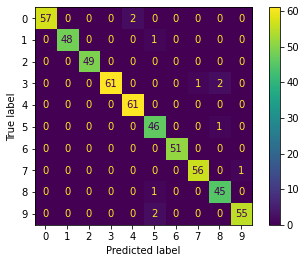

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF=['RF', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
#NaiveBayes
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 8 8 6 0 7 6 1 9 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 8 8 3 3 4 0 3 7 4
 7 0 2 7 7 3 1 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 9 3 9 0 2 9 9 2 3
 2 8 1 8 9 6 2 0 4 8 5 4 4 7 6 8 6 6 1 7 5 6 3 8 3 7 2 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 9 8 9 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 9 3
 0 8 7 7 0 3 3 3 6 3 3 2 9 2 6 9 0 4 2 2 7 9 2 6 7 6 8 7 1 9 3 4 0 6 4 8 5
 3 6 3 2 4 0 4 4 9 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 8 8 5 0 9 6 0 1 8 2 0 9
 5 6 8 0 5 0 9 2 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 9 7 6 4 6 2 9 4 7 1 3 7 8
 8 6 9 8 8 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 9 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 2 9 2 9 8 7 0 1 3 8 9 8 1 1 9 8 3 0 0 7 3 1
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 5 2 6 6 7 1 0 8 4 8 9 5 4 5 2 5 3 3 3 5 1 8 7 6 8 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

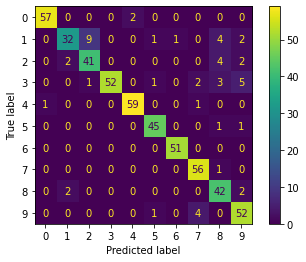

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB=['Naive_Bayes', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
#RBF
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 2 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 3 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 1 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

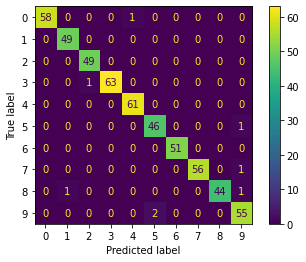

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RBF=['RBF Kernel', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
# using feature
clf = RandomForestClassifier()
clf.fit(data['data'], data['target'])

RandomForestClassifier()

In [ ]:
feature_sr = pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False) 
feature_imp = feature_sr.head(30)
print(feature_imp)

pixel_2_5    0.050367
pixel_5_3    0.042370
pixel_4_4    0.040208
pixel_3_2    0.037637
pixel_5_2    0.036748
pixel_3_4    0.033157
pixel_3_6    0.031552
pixel_1_5    0.030536
pixel_2_4    0.029902
pixel_4_2    0.029205
pixel_7_5    0.028111
pixel_4_1    0.027828
pixel_7_4    0.025772
pixel_3_3    0.025468
pixel_2_3    0.025243
pixel_1_2    0.025111
pixel_3_5    0.024581
pixel_6_6    0.024130
pixel_6_5    0.024115
pixel_4_6    0.023964
pixel_2_2    0.022726
pixel_7_2    0.021978
pixel_6_3    0.021954
pixel_0_2    0.020161
pixel_5_4    0.019669
pixel_4_3    0.019265
pixel_4_5    0.019181
pixel_0_5    0.018327
pixel_7_6    0.018288
pixel_6_2    0.017782
dtype: float64


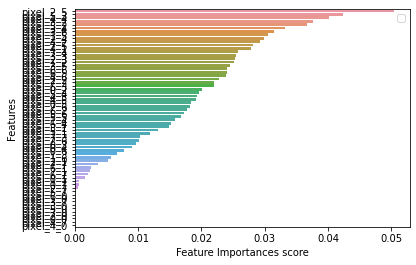

In [ ]:
sns.barplot(x=feature_sr, y=feature_sr.index)
plt.xlabel('Feature Importances score')
plt.ylabel('Features')
plt.legend()
plt.show()

In [ ]:
x_new = data['data'][feature_imp.index]
x_train, x_test, y_train, y_test = tts(x_new, data['target'], test_size=0.3, random_state=1)

In [ ]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 1 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 9 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 8 9 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 3 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 5 2 6 6 7 1 0 8 4 7 9 5 4 5 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

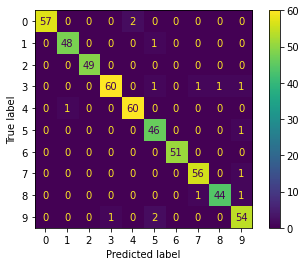

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF_feature=['RF feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
#NaiveBayes
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 8 8 6 0 7 6 1 9 7 5 9 8 3 2 1 8
 1 1 0 7 9 0 0 8 7 2 7 1 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 8 8 3 3 4 0 3 7 4
 8 0 2 1 7 3 1 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 4 4 2 3 8 9 3 9 0 2 9 9 2 3
 2 8 1 8 9 6 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 2 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 2 5 9 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 7 2 7 6 1 6 8 4 0 3 1 0 9 9 9 4 1 8 6 8 0 9 5 9 8 2 3 9 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 2 6 9 0 4 2 2 7 9 6 6 7 6 8 7 1 9 3 4 0 6 4 8 5
 3 6 3 2 4 0 4 4 5 7 7 1 5 2 7 0 9 0 4 4 0 1 4 6 4 8 8 5 0 9 6 0 1 8 2 0 9
 5 6 8 0 5 0 9 6 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 9 7 6 4 6 2 9 4 7 1 3 7 8
 8 6 9 8 8 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 9 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 2 9 2 9 8 7 0 1 3 8 9 2 1 1 9 8 3 0 0 7 3 1
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 5 2 6 6 7 8 0 1 4 8 9 5 4 6 2 5 3 3 3 5 1 8 7 6 8 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

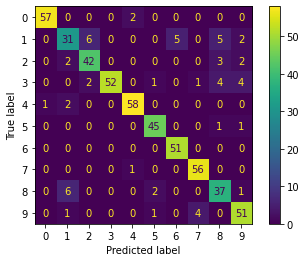

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB_feature=['Naive Bayes feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
#RBF
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 1 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 5 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 6 2 0 4 8 5 4 4 7 6 7 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 8 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 8 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 3 7 1 9 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 4 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 7 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 9 5 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 3 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 3 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 7 9 5 4 1 2 5 3 3 3 5 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 4 0 2 6 9 3 

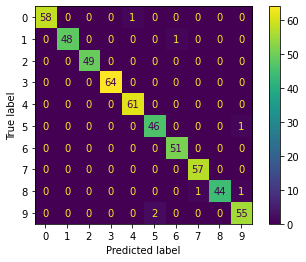

In [ ]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RBF_feature=['RBF Kernel feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
print(RF) 
print(NB)
print(RBF)
print(RF_feature)
print(NB_feature)
print(RBF_feature)

['RF', 0.98, 0.98, 0.98, 0.98]
['Naive_Bayes', 0.9, 0.9, 0.9, 0.9]
['RBF Kernel', 0.99, 0.99, 0.99, 0.98]
['RF feature', 0.97, 0.97, 0.97, 0.97]
['Naive Bayes feature', 0.89, 0.88, 0.89, 0.88]
['RBF Kernel feature', 0.99, 0.99, 0.99, 0.99]


In [ ]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])

t.add_row(RF)
t.add_row(NB)
t.add_row(RBF)
t.add_row(RF_feature)
t.add_row(NB_feature)
t.add_row(RBF_feature)
print(t)

+---------------------+----------+-----------+--------+------+
|    Classification   | Accuracy | Precision | Recall |  F1  |
+---------------------+----------+-----------+--------+------+
|          RF         |   0.98   |    0.98   |  0.98  | 0.98 |
|     Naive_Bayes     |   0.9    |    0.9    |  0.9   | 0.9  |
|      RBF Kernel     |   0.99   |    0.99   |  0.99  | 0.98 |
|      RF feature     |   0.97   |    0.97   |  0.97  | 0.97 |
| Naive Bayes feature |   0.89   |    0.88   |  0.89  | 0.88 |
|  RBF Kernel feature |   0.99   |    0.99   |  0.99  | 0.99 |
+---------------------+----------+-----------+--------+------+


#Task 2. 
For given bank dataset (bank.csv) having the following attributes :
1.	**age** (numeric)
2.	**job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.	**marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.	**education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.	**default**: has credit in default? (categorical: 'no','yes','unknown')
6.	**housing**: has housing loan? (categorical: 'no','yes','unknown')
7.	**loan**: has personal loan? (categorical: 'no','yes','unknown')
8.	**contact**: contact communication type (categorical: 'cellular','telephone')
9.	**month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	**day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.	**duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12.	**campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	**pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	**previous**: number of contacts performed before this campaign and for this client (numeric)
15.	**poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Output variable (desired target):
16.	**y**. has the client subscribed a term deposit? (binary: 'yes','no')



In [154]:
data = pd.read_csv('bank.csv')


#3.1. Apply StandardScaler() function to columns that contains numerical data ('age', 'balance', 'day', 'campaign', 'pdays', 'previous')

In [155]:
#code
sc = StandardScaler()
data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']] = sc.fit_transform(data[['age', 'balance', 'day', 'campaign', 'pdays', 'previous']])
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,1042,-0.554168,-0.481184,-0.363260,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,1467,-0.554168,-0.481184,-0.363260,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,1389,-0.554168,-0.481184,-0.363260,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,579,-0.554168,-0.481184,-0.363260,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,673,-0.186785,-0.481184,-0.363260,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,blue-collar,single,primary,no,-0.473616,yes,no,cellular,0.515650,apr,257,-0.554168,-0.481184,-0.363260,unknown,no
11158,-0.187357,services,married,secondary,no,-0.246658,no,no,unknown,0.040612,jun,83,0.547981,-0.481184,-0.363260,unknown,no
11159,-0.774958,technician,single,secondary,no,-0.464934,no,no,cellular,0.396891,aug,156,-0.186785,-0.481184,-0.363260,unknown,no
11160,0.148416,technician,married,secondary,no,-0.473926,no,yes,cellular,-0.909466,may,9,-0.186785,1.109571,1.818332,failure,no


#3.2. Apply Encode Categorical Value (OneHotEncoder) to transfrom categorical data to numerical data ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome')

In [156]:
#code
encoder = OneHotEncoder()
en_data = encoder.fit_transform(data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
en_df = pd.DataFrame(en_data.toarray(), columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']))
data = pd.concat([data, en_df], axis=1)
data.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], inplace=True)
data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,yes,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,yes,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,no,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,no,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,no,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,no,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [157]:
data['deposit'] = data['deposit'].map({'yes':1, 'no' : 0})
x_train, x_test, y_train, y_test = tts(data.drop(['deposit'], axis=1), data['deposit'], test_size=0.3, random_state=1)
data

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1042,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.239676,-0.459974,-1.265746,1467,-0.554168,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.019470,-0.080160,-1.265746,1389,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.155733,0.293762,-1.265746,579,-0.554168,-0.481184,-0.363260,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.071790,-0.416876,-1.265746,673,-0.186785,-0.481184,-0.363260,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-0.473616,0.515650,257,-0.554168,-0.481184,-0.363260,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11158,-0.187357,-0.246658,0.040612,83,0.547981,-0.481184,-0.363260,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11159,-0.774958,-0.464934,0.396891,156,-0.186785,-0.481184,-0.363260,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11160,0.148416,-0.473926,-0.909466,9,-0.186785,1.109571,1.818332,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#3.3. Apply **Decision tree, Random forest, kNN, NaïveBayes** to preproceed dataset in the previous steps. Then compare the obtained results using **accuracy, precision, recall, f1** measures.

In [158]:
#code
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

[0 0 0 ... 0 1 0]
Accuracy:  0.8512988951925948
Precision:  0.8155002891844997
Recall:  0.8873505349276274
F1:  0.8499095840867992


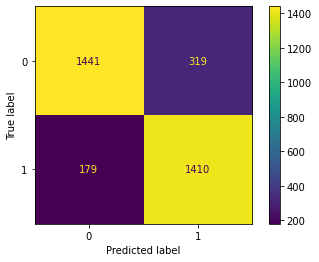

In [159]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF=['RF', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [160]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

[0 0 0 ... 0 1 0]
Accuracy:  0.7255897282770977
Precision:  0.7829391891891891
Recall:  0.5833857772183764
F1:  0.6685899747565813


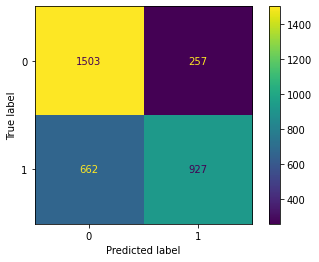

In [161]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB=['Naive Bayes', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [162]:
#tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

[0 0 1 ... 0 1 0]
Accuracy:  0.7948641385488205
Precision:  0.7822277847309136
Recall:  0.7866582756450597
F1:  0.7844367743959837


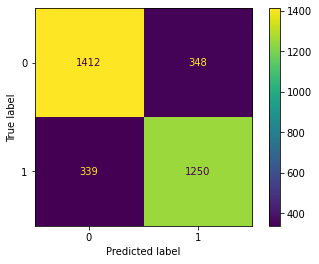

In [163]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
tree=['Decision Tree', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

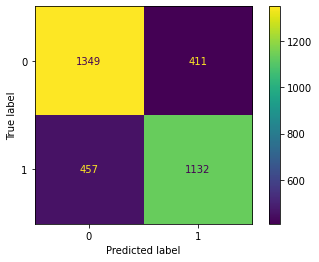

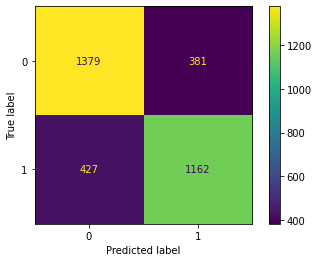

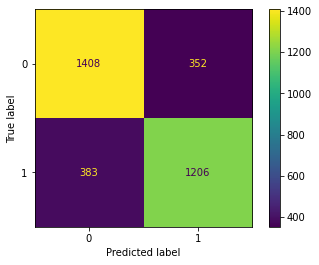

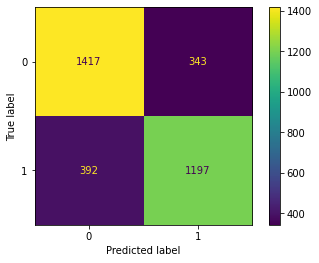

In [164]:
#KNN
k_range = range(1,8,2)
ac = []
ps = []
rs = []
fs = []
for k in k_range:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  ac.append(m.accuracy_score(y_test, y_predict))
  ps.append(m.precision_score(y_test, y_predict))
  rs.append(m.recall_score(y_test, y_predict))
  fs.append(m.f1_score(y_test, y_predict))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
  

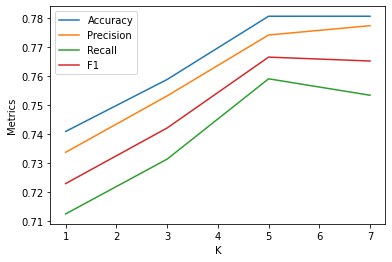

In [165]:
plt.plot(k_range, ac, label='Accuracy')
plt.plot(k_range, ps, label='Precision')
plt.plot(k_range, rs, label='Recall')
plt.plot(k_range, fs, label='F1')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [166]:
KNN=['KNN', ac[2], ps[2], rs[2], fs[2]]
KNN

['KNN',
 0.7805315019408778,
 0.7740693196405648,
 0.7589679043423537,
 0.7664442326024785]

#3.4. Using selection feature to above dataset, then compare the classification results with those in Task 2.3. 

In [132]:
clf = RandomForestClassifier()
x = data.drop(['deposit'], axis=1)
clf.fit(x, data['deposit'])

RandomForestClassifier()

In [133]:
feature_imp = pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp.head(20)

duration               0.330929
balance                0.076780
age                    0.073780
day                    0.065683
campaign               0.033248
poutcome_success       0.032604
pdays                  0.031519
previous               0.023144
contact_unknown        0.022075
housing_yes            0.017778
contact_cellular       0.016129
housing_no             0.014949
month_mar              0.013052
month_apr              0.012926
month_may              0.011974
month_oct              0.011443
month_aug              0.011261
month_jun              0.010353
education_tertiary     0.009503
education_secondary    0.009326
dtype: float64

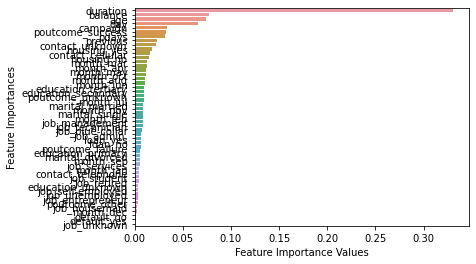

In [134]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Values')
plt.ylabel('Feature Importances')
plt.show()

In [135]:
x_train, x_test, y_train, y_test = tts(data[feature_imp.index[:21].values], data['deposit'], test_size=0.3, random_state=1)

In [136]:
#code
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

[0 0 0 ... 0 1 0]
Accuracy:  0.8390564347566438
Precision:  0.8073770491803278
Recall:  0.8678414096916299
F1:  0.8365180467091293


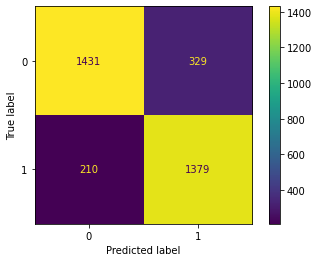

In [137]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF_feature=['RF Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [138]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

[0 0 0 ... 0 0 0]
Accuracy:  0.7354434159450582
Precision:  0.8275862068965517
Recall:  0.5588420390182505
F1:  0.667167543200601


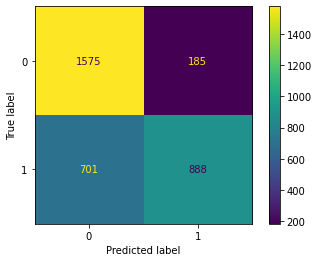

In [139]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB_feature=['Naive Bayes Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [143]:
#tree
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

[0 0 1 ... 0 1 0]
Accuracy:  0.7754553598088981
Precision:  0.763373190685966
Recall:  0.763373190685966
F1:  0.763373190685966


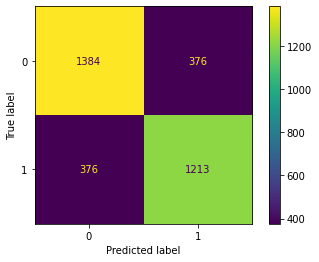

In [144]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
tree_feature=['Decision Tree Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

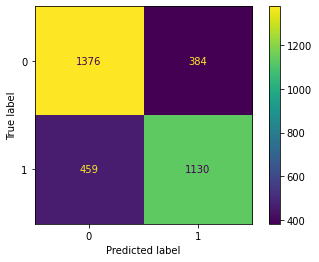

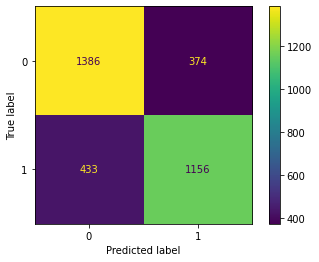

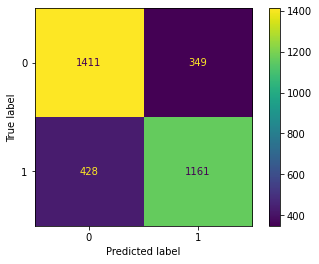

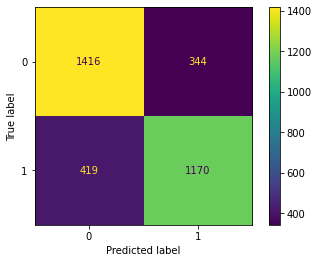

In [145]:
#KNN
k_range = range(1,8,2)
ac = []
ps = []
rs = []
fs = []
for k in k_range:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x_train, y_train)
  y_predict = clf.predict(x_test)
  ac.append(m.accuracy_score(y_test, y_predict))
  ps.append(m.precision_score(y_test, y_predict))
  rs.append(m.recall_score(y_test, y_predict))
  fs.append(m.f1_score(y_test, y_predict))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
  

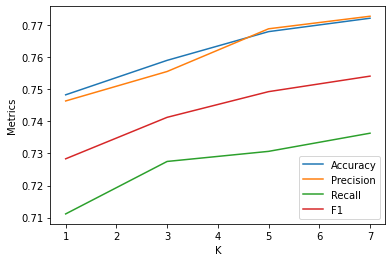

In [146]:
plt.plot(k_range, ac, label='Accuracy')
plt.plot(k_range, ps, label='Precision')
plt.plot(k_range, rs, label='Recall')
plt.plot(k_range, fs, label='F1')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [150]:
KNN_feature=['KNN Feature', ac[3], ps[3], rs[3], fs[3]]
KNN_feature

['KNN Feature',
 0.7721707972529113,
 0.7727873183619551,
 0.7363121460037759,
 0.7541089268449886]

In [167]:
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(RF)
t.add_row(NB)
t.add_row(tree)
t.add_row(KNN)
t.add_row(RF_feature)
t.add_row(NB_feature)
t.add_row(tree_feature)
t.add_row(KNN_feature)
print(t)

+-----------------------+--------------------+--------------------+--------------------+--------------------+
|     Classification    |      Accuracy      |     Precision      |       Recall       |         F1         |
+-----------------------+--------------------+--------------------+--------------------+--------------------+
|           RF          |        0.85        |        0.82        |        0.89        |        0.85        |
|      Naive Bayes      |        0.73        |        0.78        |        0.58        |        0.67        |
|     Decision Tree     |        0.79        |        0.78        |        0.79        |        0.78        |
|          KNN          | 0.7805315019408778 | 0.7740693196405648 | 0.7589679043423537 | 0.7664442326024785 |
|       RF Feature      |        0.84        |        0.81        |        0.87        |        0.84        |
|  Naive Bayes Feature  |        0.74        |        0.83        |        0.56        |        0.67        |
| Decision

#Task 4. 
For a given dataset in the Lab #5 (**credit card dataset**), perform feature selection and thencompare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression, SVM, Random Forest and NaiveBayes) based on accuracy, precision, recall, f1 measures.


In [249]:
data = pd.read_csv('creditcard.csv')
# data = load_data.head(int(load_data[['Class']].count()/3))
x =data.drop('Class', axis=1)
y = data[['Class']]
x_train, x_test, y_train, y_test = tts(x, y,test_size=0.3, random_state=1)

In [ ]:
#RBF
clf = svm.SVC()
clf.fit(x_train, y_train)

[0 0 0 ... 0 0 0]
Accuracy: 0.9984199992977775
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


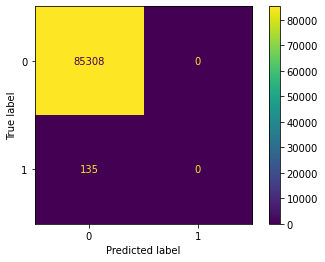

In [197]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
RBF = ["RBF", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

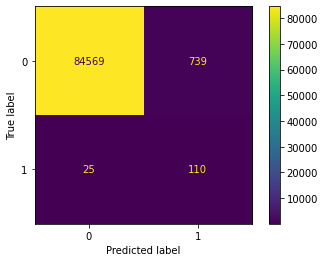

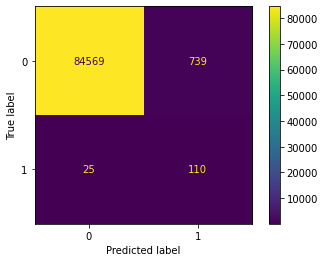

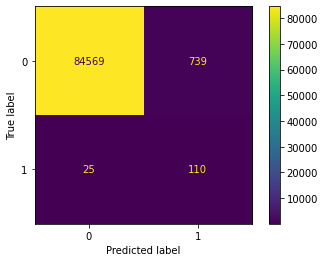

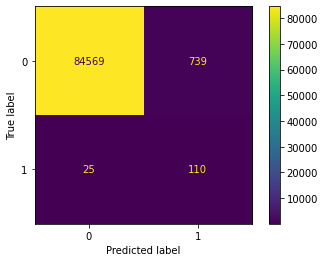

In [250]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred))
  recall.append( m.recall_score(y_test, pred))
  f1.append(m.f1_score(y_test, pred))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

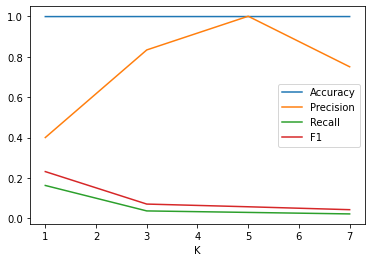

In [251]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [252]:
knn=['KNN', round(acc[2],2), round(prec[2],2), round(recall[2],2), round(f1[2],2)]
knn

['KNN', 1.0, 1.0, 0.03, 0.06]

In [256]:
#tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

[0 0 0 ... 0 0 0]
Accuracy: 0.9991456292499094
Precision: 0.7279411764705882
Recall: 0.7333333333333333
F1: 0.7306273062730627


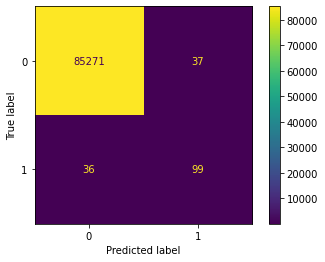

In [257]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
tree = ["Decision Tree", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

In [ ]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train)

[0 0 0 ... 0 0 0]
Accuracy: 0.9991456292499094
Precision: 0.7279411764705882
Recall: 0.7333333333333333
F1: 0.7306273062730627


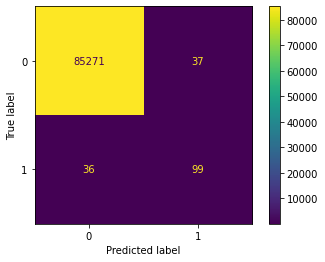

In [204]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
logic = ["Logistic Regression", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

In [205]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

<ipython-input-205-2aa6ef18f55a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier()

[0 0 0 ... 0 0 0]
Accuracy:  0.9994967405170698
Precision:  0.896551724137931
Recall:  0.7703703703703704
F1:  0.8286852589641435


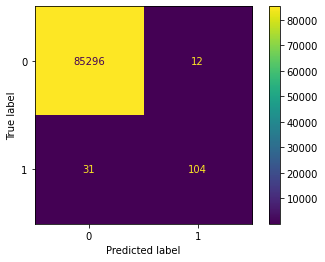

In [206]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF=['RF', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)

[0 0 0 ... 0 0 0]
Accuracy:  0.9933288859239493
Precision:  0.5705514051998223
Recall:  0.8154648775938691
F1:  0.6142279132386735


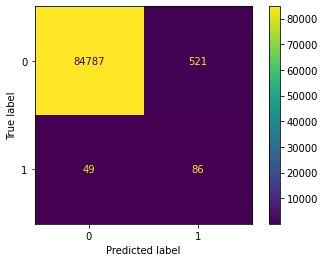

In [209]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB=['Naive Bayes', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [ ]:
clf = RandomForestClassifier()
clf.fit(x, y)

In [211]:
feature_imp = pd.Series(clf.feature_importances_, index=clf.feature_names_in_).sort_values(ascending=False)
feature_imp

V17       0.157053
V14       0.139721
V12       0.126584
V10       0.087639
V11       0.072487
V16       0.056666
V9        0.035671
V18       0.029507
V4        0.025876
V7        0.021060
V26       0.020906
V21       0.017553
V3        0.016797
V2        0.014751
Time      0.014651
V6        0.014225
V1        0.013979
V27       0.012463
V20       0.012202
V19       0.012016
V15       0.011570
V28       0.010907
Amount    0.010625
V13       0.010359
V5        0.009538
V22       0.009478
V25       0.009228
V24       0.009128
V8        0.009047
V23       0.008313
dtype: float64

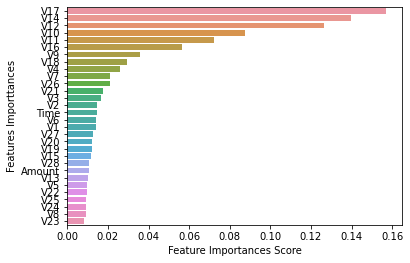

In [212]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importances Score')
plt.ylabel('Features Importtances')
plt.show()

In [221]:
x_new = x[feature_imp[feature_imp > 0.02].index.values]
x_train, x_test, y_train, y_test = tts(x_new, y, test_size=0.3, random_state=1)

In [ ]:
#RBF
clf = svm.SVC()
clf.fit(x_train, y_train)

[0 0 0 ... 0 0 0]
Accuracy: 0.9993797034280163
Precision: 0.9361702127659575
Recall: 0.6518518518518519
F1: 0.7685589519650656


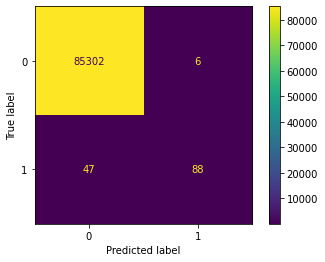

In [223]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
RBF_feature = ["RBF Feature", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

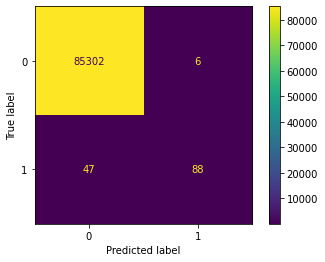

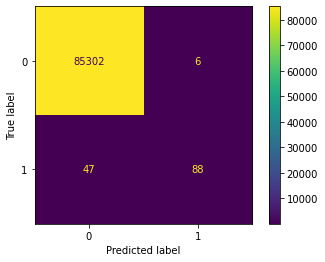

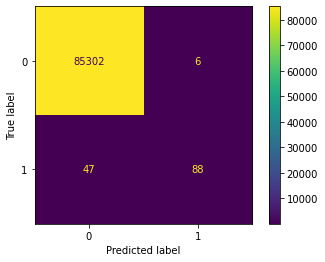

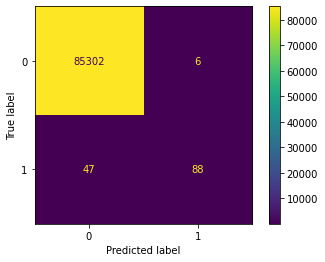

In [224]:
#KNN
acc=[]
prec =[]
recall=[]
f1=[]
k_range = range(1,8,2)
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)
  acc.append(m.accuracy_score(y_test, pred))
  prec.append(m.precision_score(y_test, pred))
  recall.append( m.recall_score(y_test, pred))
  f1.append(m.f1_score(y_test, pred))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

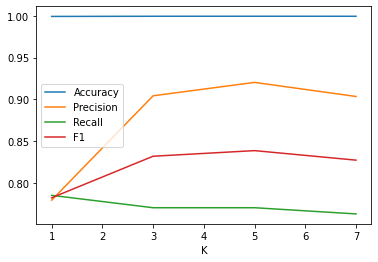

In [225]:
plt.plot(k_range, acc, label='Accuracy')
plt.plot(k_range, prec, label='Precision')
plt.plot(k_range, recall, label='Recall')
plt.plot(k_range, f1, label='F1')
plt.xlabel('K')
plt.legend()

In [228]:
KNN_feature=['KNN Feature', round(acc[2],2), round(prec[2],2), round(recall[2],2), round(f1[2],2)]
KNN_feature

['KNN Feature', 1.0, 0.92, 0.77, 0.84]

In [ ]:
#tree
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)

[0 0 0 ... 0 0 0]
Accuracy: 0.9992275552122467
Precision: 0.7804878048780488
Recall: 0.7111111111111111
F1: 0.7441860465116279


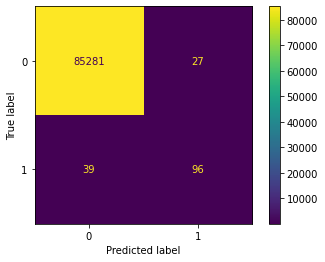

In [232]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
tree_feature = ["Decision Tree Feature", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

In [ ]:
#logistic regression
logistic = LogisticRegression(random_state=1)
logistic.fit(x_train, y_train)

[0 0 0 ... 0 0 0]
Accuracy: 0.9992275552122467
Precision: 0.7804878048780488
Recall: 0.7111111111111111
F1: 0.7441860465116279


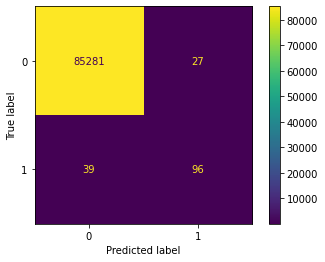

In [234]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print('Accuracy:',ac)
print('Precision:',ps)
print('Recall:',rs)
print('F1:',fs)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
logic_feature = ["Logistic Regression Feature", round(ac,2), round(ps,2), round(rs,2),round(fs,2)]

In [235]:
#Random forest
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

<ipython-input-235-2aa6ef18f55a>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


RandomForestClassifier()

[0 0 0 ... 0 0 0]
Accuracy:  0.9994733330992591
Precision:  0.8947368421052632
Recall:  0.7555555555555555
F1:  0.8192771084337349


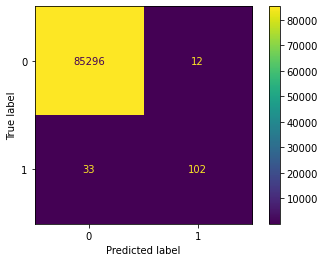

In [236]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict)
rs = m.recall_score(y_test, y_predict)
fs = m.f1_score(y_test, y_predict)
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
RF_feature=['RF Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [237]:
#NaiveBayes
clf = GaussianNB()
clf.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

[0 0 0 ... 0 0 0]
Accuracy:  0.991058366396311
Precision:  0.5646343319673408
Recall:  0.9030760434087203
F1:  0.6095402629521581


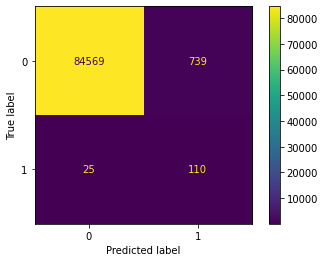

In [238]:
y_predict = clf.predict(x_test)
print(y_predict)
ac = m.accuracy_score(y_test, y_predict)
ps = m.precision_score(y_test, y_predict, average='macro')
rs = m.recall_score(y_test, y_predict, average='macro')
fs = m.f1_score(y_test, y_predict, average='macro')
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_predict))
print('Accuracy: ', ac)
print('Precision: ', ps)
print('Recall: ', rs)
print('F1: ', fs)
NB_feature=['Naive Bayes Feature', round(ac,2), round(ps,2), round(rs,2), round(fs,2)]

In [259]:
from prettytable import PrettyTable
t = PrettyTable(['Classification', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(logic)
t.add_row(knn)
t.add_row(tree)
t.add_row(RBF)
t.add_row(RF)
t.add_row(NB)
t.add_row(logic_feature)
t.add_row(KNN_feature)
t.add_row(tree_feature)
t.add_row(RBF_feature)
t.add_row(RF_feature)
t.add_row(NB_feature)
print(t)

+-----------------------------+----------+-----------+--------+------+
|        Classification       | Accuracy | Precision | Recall |  F1  |
+-----------------------------+----------+-----------+--------+------+
|     Logistic Regression     |   1.0    |    0.73   |  0.73  | 0.73 |
|             KNN             |   1.0    |    1.0    |  0.03  | 0.06 |
|        Decision Tree        |   1.0    |    0.73   |  0.73  | 0.73 |
|             RBF             |   1.0    |    0.0    |  0.0   | 0.0  |
|              RF             |   1.0    |    0.9    |  0.77  | 0.83 |
|         Naive Bayes         |   0.99   |    0.57   |  0.82  | 0.61 |
| Logistic Regression Feature |   1.0    |    0.78   |  0.71  | 0.74 |
|         KNN Feature         |   1.0    |    0.92   |  0.77  | 0.84 |
|    Decision Tree Feature    |   1.0    |    0.78   |  0.71  | 0.74 |
|         RBF Feature         |   1.0    |    0.94   |  0.65  | 0.77 |
|          RF Feature         |   1.0    |    0.89   |  0.76  | 0.82 |
|     

#Finally,
Save a copy in your Github. Remember renaming the notebook.